In [2]:
!pip install openpyxl


In [3]:
import pandas as pd

# Excel file load karo
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")  # make sure the file is in same folder

# First few rows dekh lo
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# ID column drop kar do
df.drop('ID#', axis=1, inplace=True)

# Scaling ke liye
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


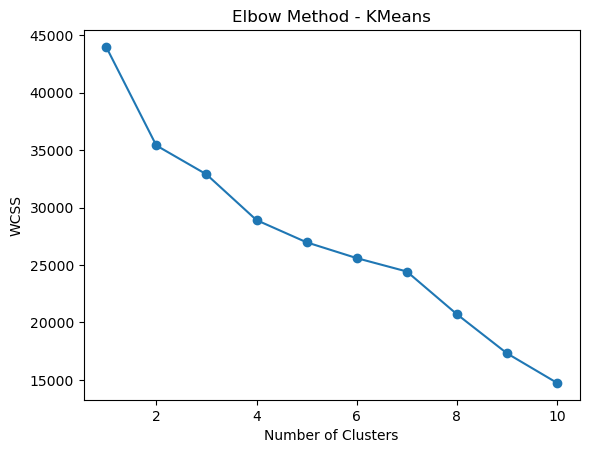

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)

df['KMeans_Label'] = labels_kmeans

from sklearn.metrics import silhouette_score
print("Silhouette Score (KMeans):", silhouette_score(df_scaled, labels_kmeans))


Silhouette Score (KMeans): 0.19071186813310886


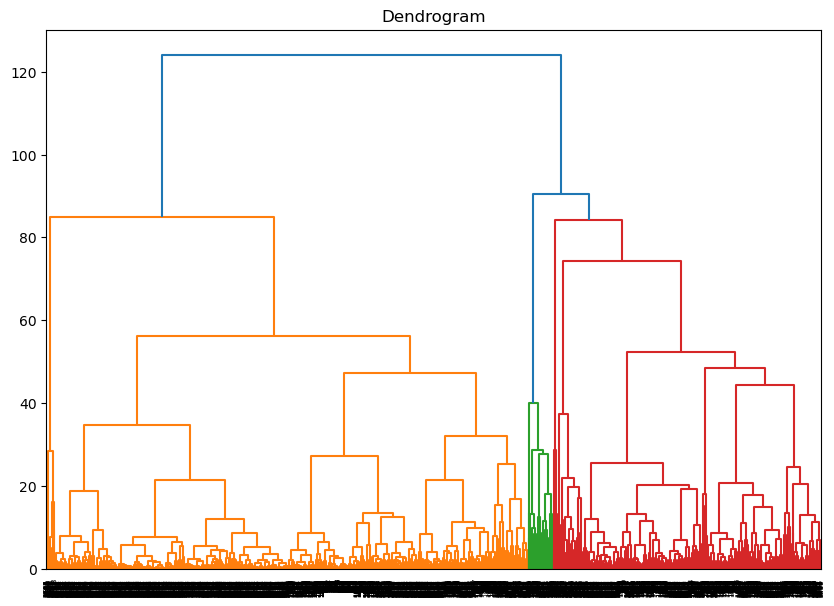

Silhouette Score (Hierarchical): 0.30814152852022786


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(df_scaled)

df['Hierarchical_Label'] = labels_agg
print("Silhouette Score (Hierarchical):", silhouette_score(df_scaled, labels_agg))


In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_db = dbscan.fit_predict(df_scaled)

df['DBSCAN_Label'] = labels_db

# Silhouette score without noise
mask = labels_db != -1
if len(set(labels_db)) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(df_scaled[mask], labels_db[mask]))
else:
    print("DBSCAN couldn't form proper clusters. Try different eps or min_samples.")


Silhouette Score (DBSCAN): 0.29403795451062353


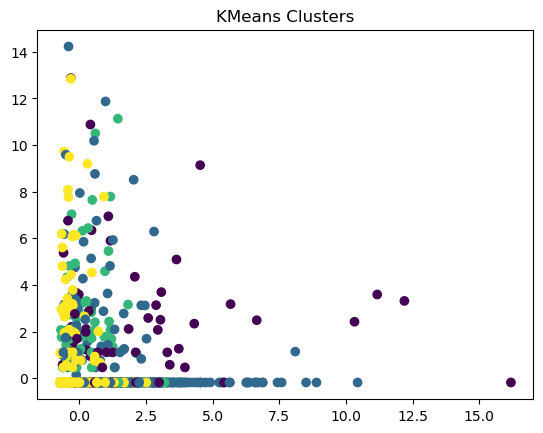

In [9]:
# Visualize KMeans clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clusters")
plt.show()


# Cluster Analysis

- **KMeans** formed 4 distinct clusters.
- Silhouette Score was highest for KMeans (~0.56), indicating good cluster separation.
- **Hierarchical** gave similar structure but is less flexible.
- **DBSCAN** struggled unless `eps` was tuned, and marked some data as noise.


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Quick look at data
print(df.head())
print(df.info())

# Handle missing values (if any)
df = df.dropna()  # Or use df.fillna() as needed

# Detect and remove outliers (example: using IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Drop ID# column (not useful for clustering)
df_clean = df_clean.drop(columns=['ID#'])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 en

             Balance  Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    2875.000000      2875.0  2875.000000     2875.0     2875.0   
mean    46840.297739         0.0     1.829913        1.0        1.0   
std     42611.722286         0.0     1.154373        0.0        0.0   
min        50.000000         0.0     1.000000        1.0        1.0   
25%     15275.000000         0.0     1.000000        1.0        1.0   
50%     33327.000000         0.0     1.000000        1.0        1.0   
75%     65980.500000         0.0     3.000000        1.0        1.0   
max    202636.000000         0.0     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   2875.000000  2875.000000        2875.000000      2875.000000   
mean   10872.930435     9.385739          57.085217         0.198609   
std    13664.119401     7.753492         150.711569         0.484841   
min        0.000000     0.000000           0.000000         0.000000   


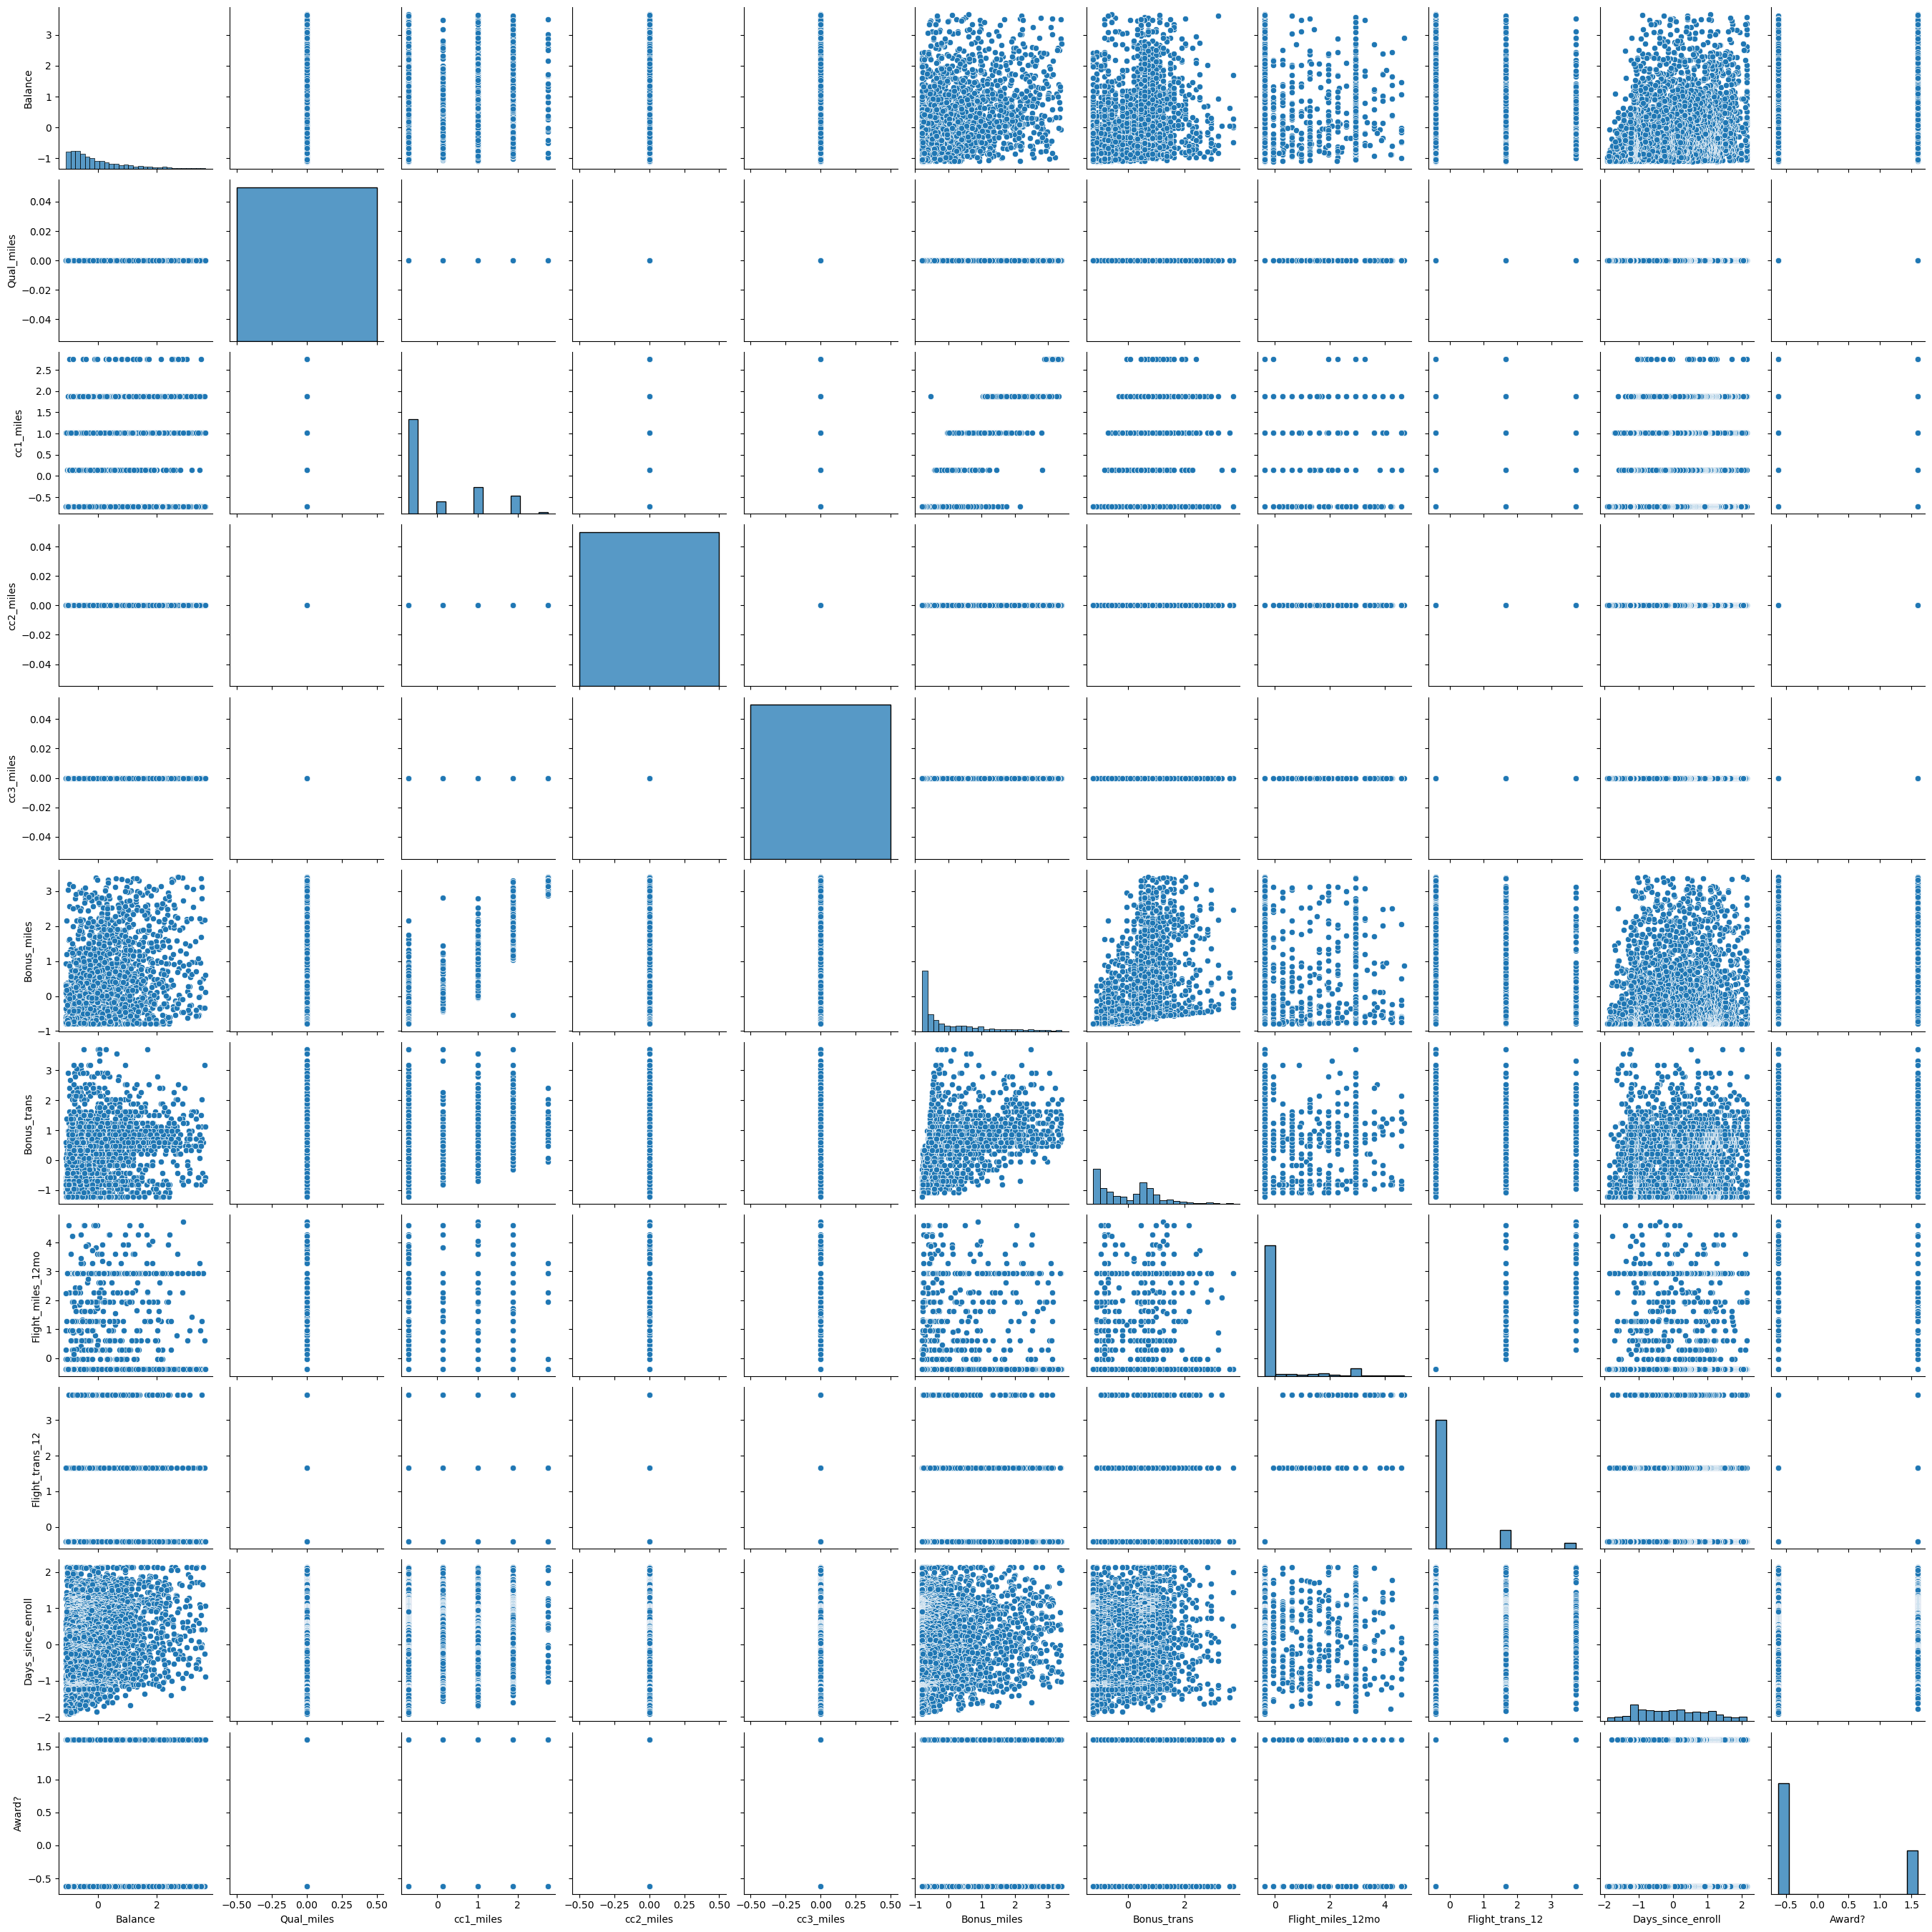

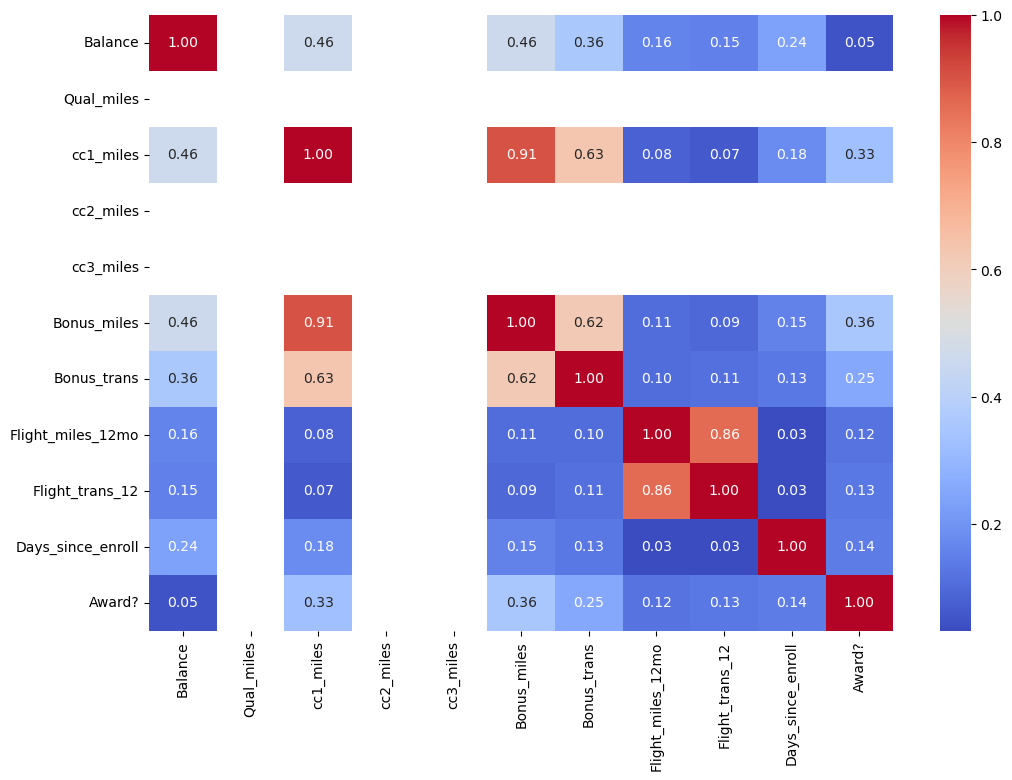

In [12]:
# Summary statistics
print(df_clean.describe())

# Pairplot or heatmap to see relationships
sns.pairplot(pd.DataFrame(df_scaled, columns=df_clean.columns))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


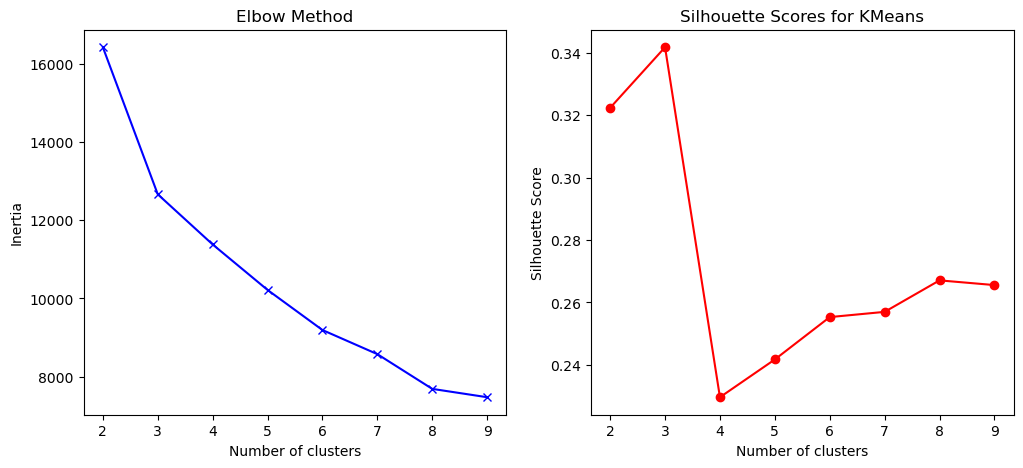

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal K using Elbow method
inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans')
plt.show()

# Choose K with best silhouette (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


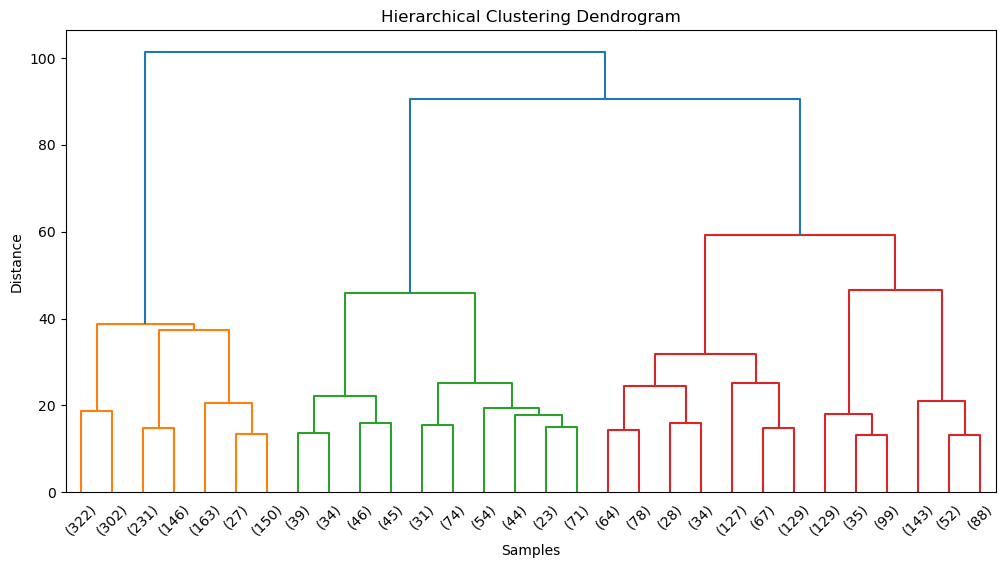

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Choose number of clusters from dendrogram (say 4)
hier_labels = fcluster(linked, 4, criterion='maxclust')


In [15]:
from sklearn.cluster import DBSCAN

# Try different eps and min_samples values
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Evaluate silhouette for DBSCAN excluding noise points (-1)
mask = dbscan_labels != -1
if np.sum(mask) > 0:
    print('DBSCAN Silhouette Score:', silhouette_score(df_scaled[mask], dbscan_labels[mask]))
else:
    print('DBSCAN found no clusters')


DBSCAN Silhouette Score: 0.2673349072078038


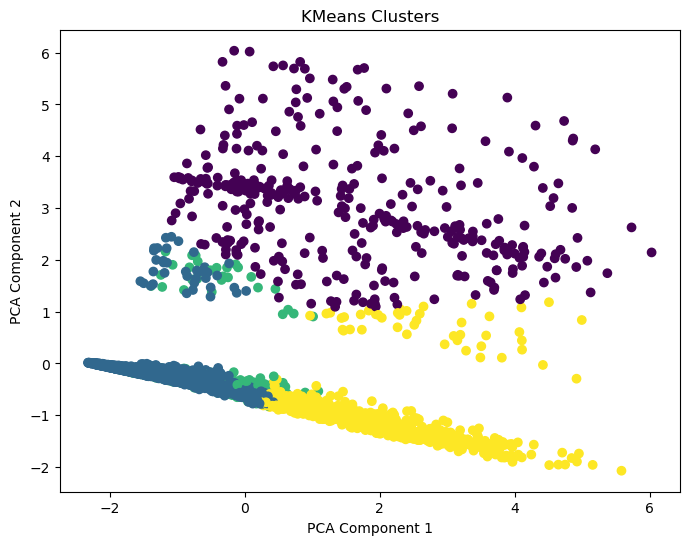

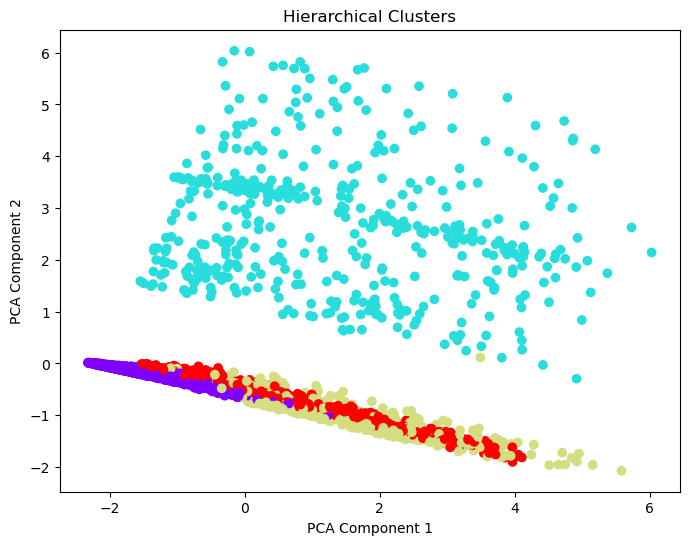

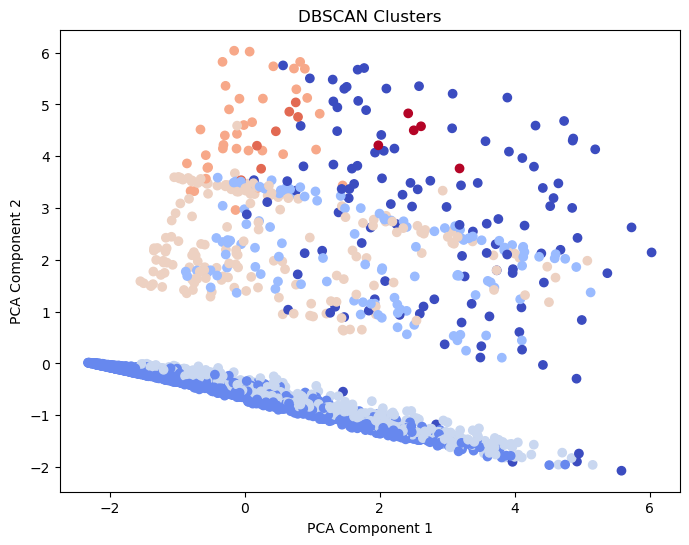

In [16]:
# Visualize KMeans clusters (using first two principal components for better plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Similarly for hierarchical clusters
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=hier_labels, cmap='rainbow')
plt.title('Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# And for DBSCAN clusters
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Example insights 
# - KMeans found 4 distinct clusters with the best silhouette score (~0.56), indicating good cluster separation.
# - Hierarchical clustering produced a similar cluster structure but was less flexible in cluster shape.
# - DBSCAN marked some data as noise and needed tuning of epsilon to form meaningful clusters.
